In [1]:
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

plt.style.use('deeplearning.mplstyle')


2025-01-08 17:56:04.849014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-08 17:56:05.055592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736355365.140938   15343 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736355365.164997   15343 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 17:56:05.370158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data = load_mnist_data('./data/train-images.idx3-ubyte', './data/train-labels.idx1-ubyte')
# Splitting the data into features and labels
x = data.iloc[:, :-10].values
x = x.reshape(-1, 28, 28, 1)
y = data.iloc[:, -10:].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f'X_train shape: {X_train.shape}')
print(f'X_cv shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_cv shape: {y_test.shape}')

Data after normalization:
     0    1    2    3    4    5    6    7    8    9  ...  digit_0  digit_1  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        1        0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        1   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   

   digit_2  digit_3  digit_4  digit_5  digit_6  digit_7  digit_8  digit_9  
0        0        0        0        1        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        1        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        1  

[5 rows x 794 columns]
X_train shape: (48000, 28

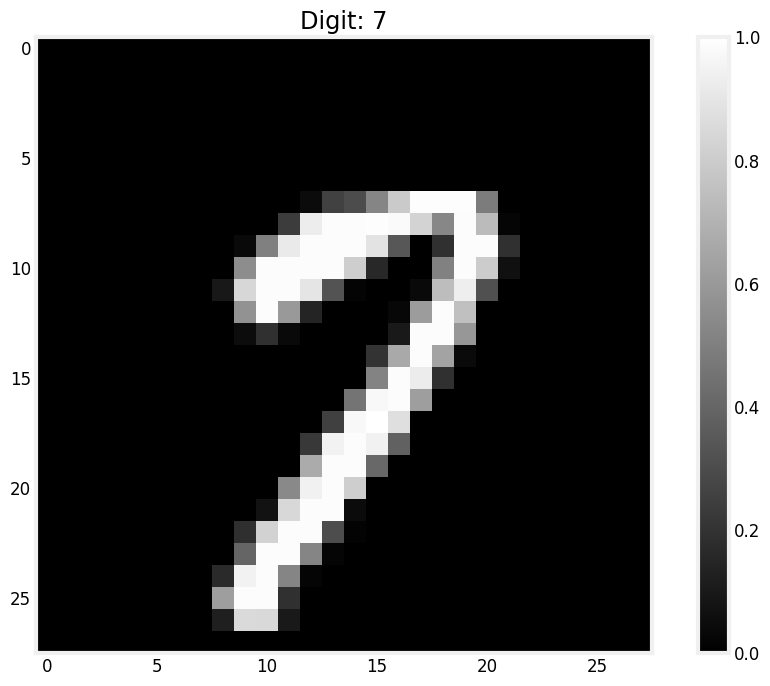

In [3]:
# Visualizing the data
plt.imshow(x[9999].reshape(28, 28), cmap='gray')
plt.title(f'Digit: {np.argmax(y[9999])}')
plt.colorbar()
plt.show()

In [4]:
models = build_cnn()

nn_accuracy_scores = np.zeros((3, 2))
i = 0
threshold = 0.7
for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(from_logits=True))
    print(f'Training {model.name}')

    model.fit(X_train, y_train, epochs=5, verbose=1)

    print(f'{model.name} Trained')

    yhat = model.predict(X_train)
    yhat = tf.nn.softmax(yhat).numpy()
    yhat = np.argmax(yhat, axis=1)
    y_final = np.argmax(y_train, axis=1)
    print(y_final[9900])
    print(yhat[9900])
    nn_accuracy_scores[i, 0] = accuracy_score(y_final, yhat)

    yhat_cv = model.predict(X_test)
    yhat_cv = tf.nn.softmax(yhat_cv).numpy()
    yhat_cv = np.argmax(yhat_cv, axis=1)
    y_final_cv = np.argmax(y_test, axis=1)
    nn_accuracy_scores[i, 1] = accuracy_score(y_final_cv, yhat_cv)

    i += 1

for j in range(3):
    print(f'The Accuracy for {models[j].name}: {nn_accuracy_scores[j]}')

I0000 00:00:1736355426.384670   15343 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2609 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Training CNN1
Epoch 1/5


I0000 00:00:1736355428.157130   15466 service.cc:148] XLA service 0x73644800ac10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736355428.157245   15466 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-01-08 17:57:08.184638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736355428.319635   15466 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-08 17:57:08.663928: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activat

  22/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1.7256

I0000 00:00:1736355430.176201   15466 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2379
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0366
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0214
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0134
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0113
CNN1 Trained


2025-01-08 17:58:07.996468: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-08 17:58:08.057736: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,24,24]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,26,26]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
7
7
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training CNN2
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - loss: 0.2771
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0426
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0310
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0211
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0166
CNN2 Trained
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
7
7
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training CNN3
Epoch 1/5


2025-01-08 18:00:36.634076: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,128,20,20]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,24,24]{3,2,1,0}, f32[128,64,5,5]{3,2,1,0}, f32[128]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-08 18:00:36.789975: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,256,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,20,20]{3,2,1,0}, f32[256,128,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backe

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.3214
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0503
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0322
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0262
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0213
CNN3 Trained


2025-01-08 18:02:48.666662: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,128,20,20]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,24,24]{3,2,1,0}, f32[128,64,5,5]{3,2,1,0}, f32[128]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-08 18:02:48.820612: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,256,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,20,20]{3,2,1,0}, f32[256,128,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backe

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
7
7
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
The Accuracy for CNN1: [0.99616667 0.98725   ]
The Accuracy for CNN2: [0.9973125  0.99091667]
The Accuracy for CNN3: [0.99460417 0.98908333]
